In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = np.loadtxt('../data/sanh_autocorr_mixed.dat')
data2 = np.loadtxt('../data/sanh_mixed_accept_HD')

In [4]:
def potential(m, w, c3, c4, x):
    return 0.5 * m * (w ** 2) * (x ** 2) * (1. + c3 * x + c4 * x ** 2)

def potentialSHO(m, w, x):
    return 0.5 * m * (w**2) * (x**2)

def AnhPart(m, w, c3, c4, x):
    return 0.5 * m * (w ** 2) * (x ** 2) * (c3 * x + c4 * x ** 2)

mass = 1.  # in A.U.
kB = 3.166811965 * 10 ** (-6)  # in A.U.
hbar = 1.0  # in A.U.

c3 = 0.0055
c4 = 0.00001

#   HARMONIC TRAP FREQUENCY, hbar * w0 = 3 meV
w0 = 0.003 * 0.0367493 # in AU
hw = hbar * w0

In [5]:
anhcontribution = []
xvals111 = 100*data[:8,0]
for x in xvals111:
    # val_temp = 100 * AnhPart(mass, w0, c3, c4, x) / potentialSHO(mass, w0, x)
    val_temp = 100 * AnhPart(mass, w0, c3, c4, x) / potential(mass, w0, c3, c4, x)
    if(np.isnan(val_temp)):
        anhcontribution.append(0)
    else:
        anhcontribution.append(val_temp)

/tmp/ipykernel_317200/487096098.py:5: RuntimeWarning: invalid value encountered in scalar divide
  val_temp = 100 * AnhPart(mass, w0, c3, c4, x) / potential(mass, w0, c3, c4, x)


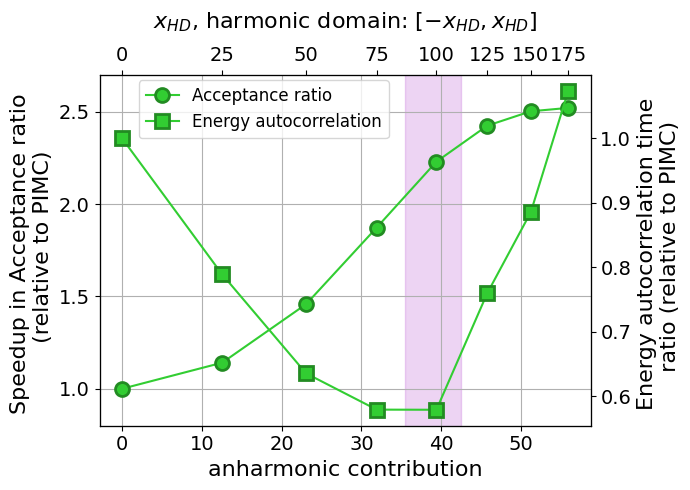

In [7]:
fig, ax1 = plt.subplots(figsize = (7, 5.))

# plt.text(0.05, 0.95, f'$\\beta \\hbar \\omega = {bhw}$', transform=plt.gca().transAxes,
#          fontsize=14, va='top', ha='left', bbox=dict(boxstyle='round,pad=0.3',
#          facecolor='white', alpha=0.5))

# --- first y-axis (left)
ax1.plot(anhcontribution, data2[:8,2]/data2[:8,2][0], linestyle='-', marker='o',
         markersize=10, color='limegreen', markerfacecolor='limegreen',
         markeredgecolor='forestgreen', markeredgewidth=2, label='Acceptance ratio')
ax1.set_xlabel('anharmonic contribution', fontsize=16)
ax1.set_ylabel('Speedup in Acceptance ratio \n (relative to PIMC)', fontsize=16)#, color='limegreen')  ### <-- CHANGED
# ax1.tick_params(axis='y', labelcolor='limegreen')                    ### <-- CHANGED

# --- second y-axis (right)
ax2 = ax1.twinx()                                                    ### <-- CHANGED
ax2.plot(anhcontribution, (data[:8,2]/data[:8,2][0]), linestyle='-',
         marker='s', markersize=10, color='limegreen',
         markerfacecolor='limegreen', markeredgecolor='forestgreen',
         markeredgewidth=2, label='Energy autocorrelation')     ### <-- CHANGED
ax2.set_ylabel('Energy autocorrelation time \n ratio (relative to PIMC)', fontsize=16)#, color='darkviolet')  ### <-- CHANGED
# ax2.tick_params(axis='y', labelcolor='darkviolet')                   ### <-- CHANGED

# --- keep your twin X-axis for x_HD labels
ax3 = ax1.twiny()
ax3.set_xlim(ax1.get_xlim())
ax3.set_xticks(anhcontribution)
ax3.set_xticklabels([f"{v:.0f}" for v in 100*data[:8,0]])
ax3.set_xlabel("$x_{HD}$, harmonic domain: $[-x_{HD}, x_{HD}]$", fontsize=16, labelpad=13)
ax3.tick_params(labelsize=14)

# --- cosmetics and legend
ax1.grid(True)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)

# keep fill and other decorations
y1 = np.array([35.5, 42.5])
y2 = np.array([3, 3])
ax1.fill_between(y1, y2, color='mediumorchid', alpha=0.25)

# combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()                    ### <-- CHANGED
ax1.legend(lines + lines2, labels + labels2, loc=[0.08, 0.82], frameon=True, fontsize=12)  ### <-- CHANGED

ax1.set_ylim(0.8, 2.7)
ax1.set_yticks([1, 1.5, 2, 2.5])
plt.tight_layout()
plt.savefig('../figures/2bodySpeedup.svg')